# **Qual é a diferença entre alfa e valor *p*?**

### Premissas básicas:

### 1. Estado do mundo pode ser dividido em duas grandes categorias: um efeito/relação existe OU não existe.

### 2. Não sabemos qual é o verdadeiro estado do mundo. É por isso que conduzimos pesquisas científicas.

### 3. Resultados são probabilísticos.

### **Alfa:** é o critério de decisão do pesquisador. [...] Indica a probabilidade teórica de que a hipótese nula será rejeitada *se ela for verdadeira*; o alfa não garante que a probabilidade de rejeitar a hipótese nula será mantida constante, a menos que se assuma que essa hipótese nula é sempre verdadeira (Nickerson, 2000, p. 242 e p. 259).

### **Valor *p*:** é a probabilidade de se obter o valor de uma estatística, *D*, igual ou superior à obtida, dado que a hipótese nula é verdadeira, *p*(*D* | *H*<sub>0</sub>).

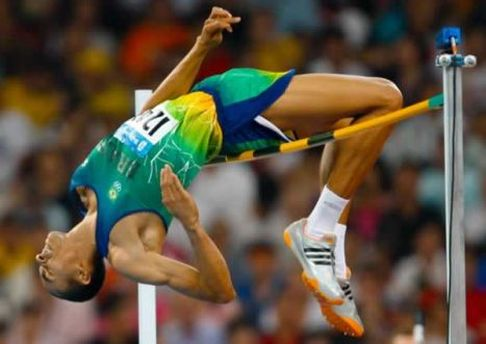

In [1]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html#statsmodels.stats.weightstats.ttest_ind

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats

plt.style.use('ggplot')

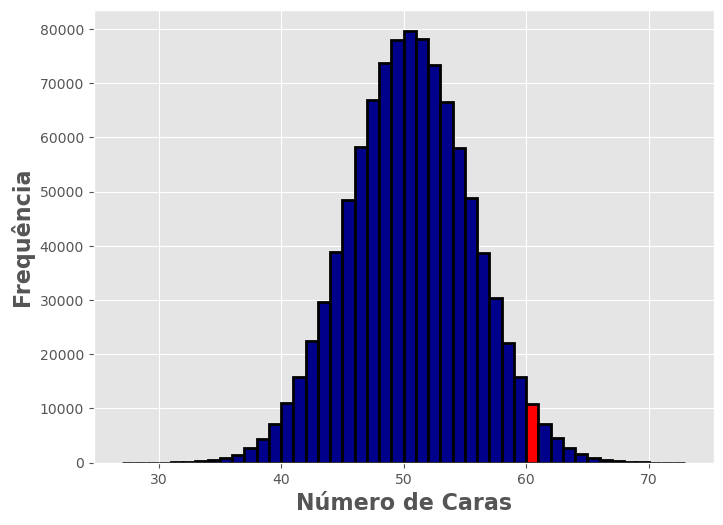

In [2]:
# Gera uma semente
np.random.seed(42)

# Parâmetros da simulação
lancamentos, probabilidade_cara, caras_observadas, n_simulacoes = 100, .5, 60, 1_000_000

resultados = np.random.binomial(n = lancamentos, p = probabilidade_cara, size = n_simulacoes)

# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

n, bins, patches = plt.hist(resultados, bins = len(np.unique(resultados)) - 1, color = "darkblue", ec = "black", lw = 2)
patches[np.where(np.sort(np.unique(resultados)) == 60)[0][0]].set_fc("red")
plt.xlabel("Número de Caras", size = 16, fontweight = "bold")
plt.ylabel("Frequência", size = 16, fontweight = "bold")

plt.savefig('Figura 1.jpg', dpi = 600, bbox_inches = "tight")
plt.show()

In [3]:
sum(resultados >= 60) / n_simulacoes
np.where(np.sort(np.unique(resultados)) == 60)[0]

array([33], dtype=int64)

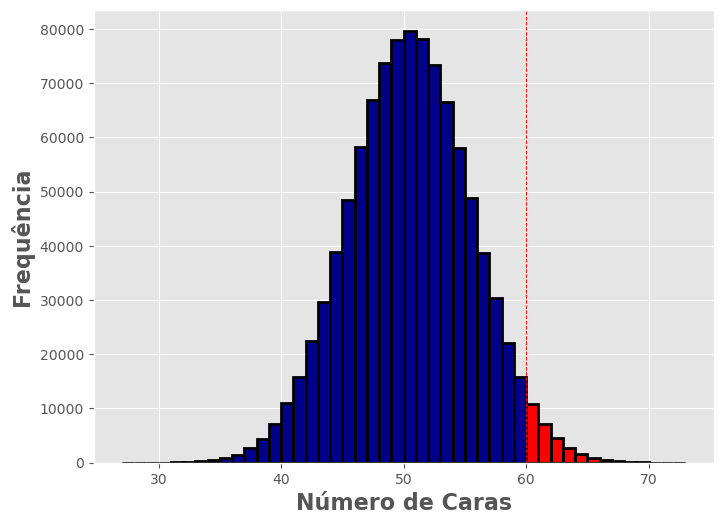

In [4]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

n, bins, patches = plt.hist(resultados, bins = len(np.unique(resultados)) - 1, color = "darkblue", ec = "black", lw = 2)

for i in range(0, len(patches)):
    if i < np.where(np.sort(np.unique(resultados)) == 60)[0][0]:
        patches[i].set_fc("darkblue")
    else:
        patches[i].set_fc("red")
plt.xlabel("Número de Caras", size = 16, fontweight = "bold")
plt.ylabel("Frequência", size = 16, fontweight = "bold")
plt.axvline(x = caras_observadas, linewidth = 0.7, color = 'red', ls = '--')

plt.savefig('Figura 2.jpg', dpi = 600, bbox_inches = "tight")
plt.show()

# Exemplo: Diferenças entre médias de escores de inteligência entre homens e mulheres

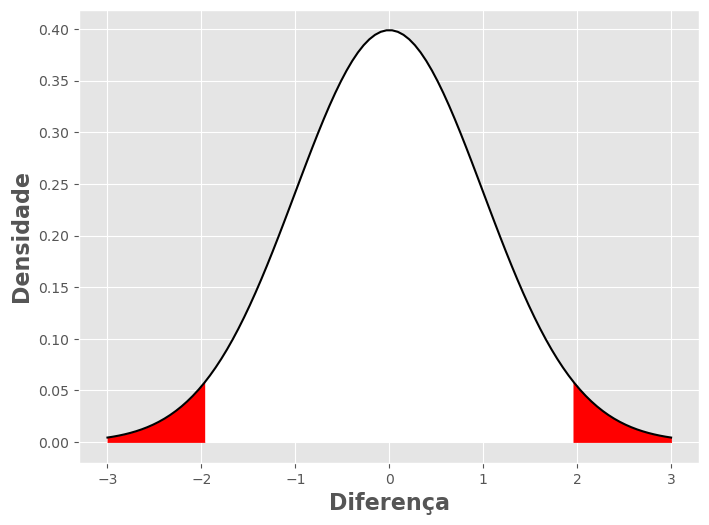

In [5]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

# Valores dos parâmetros
mu, sigma, z = 0, 1, 1.96

# Valores do eixo x
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)

# Valores do eixo x dentro do intervalo de predição
lower = np.linspace(mu - 3 * sigma, mu - sigma * z)
upper = np.linspace(mu + sigma * z, mu + 3 * sigma)
middle = np.linspace(mu - sigma * z, mu + sigma * z)

# Plotando o gráfico
# stats.norm.pdf: retorna a função densidade de probabilidade da distribuição normal
plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'black') 

# Regiões destacadas
plt.fill_between(lower, stats.norm.pdf(lower, mu, sigma), color = 'red')
plt.fill_between(middle, stats.norm.pdf(middle, mu, sigma), color = 'white')
plt.fill_between(upper, stats.norm.pdf(upper, mu, sigma), color = 'red')

# Rótulos dos eixos
plt.xlabel("Diferença", fontsize = 16, fontweight = "bold")
plt.ylabel("Densidade", fontsize = 16, fontweight = "bold")

# Salvando o gráfico
plt.savefig('Figura 3.jpg', dpi = 600, bbox_inches = "tight")

# Mostrando o gráfico
plt.show()

# Simulação 1: Hipótese nula verdadeira (inteligência de homens e de mulheres é igual)

## Questão 1: Após um elevado número de estudos com n fixo, qual é o percentual de valores ps que será menor que o alfa?

In [6]:
# Gera uma semente
np.random.seed(42)

# Parâmetros da simulação
mu, sigma, n = 100, 15, 20
alpha = 0.05
significativo = 0
n_simulacoes = 100_000 

# Lista armazenará os valores p obtidos em cada simulação
ps_student = list()

# Rodando as simulações
for simulacao in range(0, n_simulacoes):
    # Gerando os dados de cada grupo
    # Note que as médias dos grupos são iguais; logo, H0 é verdadeira
    # portanto, número de resultados significativos deveria ser próximo ao alfa nominal
    homens = np.random.normal(loc = mu, scale = sigma, size = n)
    mulheres = np.random.normal(loc = mu, scale = sigma, size = n)

    # Rodando testes t de Student
    t_student, p_student, gl_student = ttest_ind(homens, mulheres, alternative = 'two-sided', usevar = 'pooled')

    # se o p do Student < alfa...       
    if p_student < alpha:
        significativo += 1 # cometemos um erro do Tipo I

    # guarda valores ps de cada simulação uma lista
    ps_student.append(p_student)

# Imprime a síntese dos resultados
print(f"Em {n_simulacoes} simulações, {significativo} ({significativo / n_simulacoes * 100:.2f}%) testes t de Student foram significativos.")

Em 100000 simulações, 4954 (4.95%) testes t de Student foram significativos.


## Questão 2: Como é a distribuição de valores ps quando a hipótese nula é verdadeira?

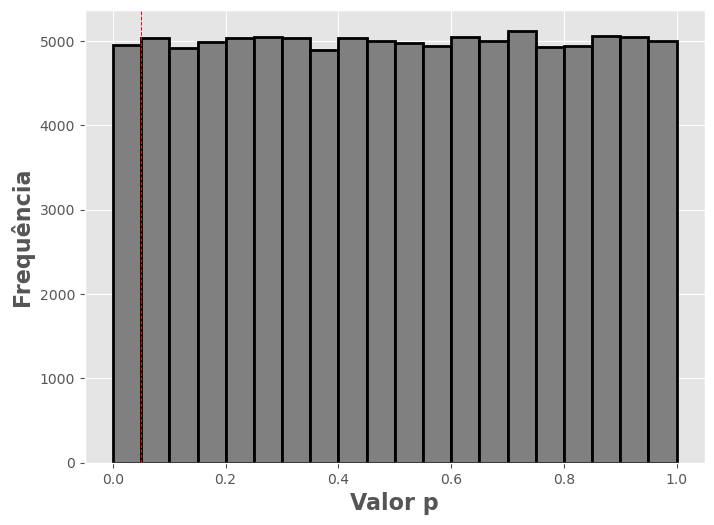

In [7]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

plt.hist(ps_student, bins = 20, color = "gray", ec = "black", lw = 2)
plt.xlabel("Valor p", size = 16, fontweight = "bold")
plt.ylabel("Frequência", size = 16, fontweight = "bold")
plt.axvline(x = alpha, linewidth = 0.7, color = 'red', ls = '--')

plt.savefig('Figura 4.jpg', dpi = 600, bbox_inches = "tight")
plt.show()

# Simulação 2: Hipótese nula falsa (inteligência de mulheres é 0,5 DP [7,5 pontos] maior que a de homens)

## Questão 3: Após um elevado número de estudos com n fixo, qual é o percentual de valores ps que serão menores que o alfa?

In [8]:
# Gera uma semente
np.random.seed(42)

# Parâmetros da simulação
mu_homens, mu_mulheres, sigma, n = 100, 107.5, 15, 20 # mulheres têm 0,5 DP mais inteligência que homens
alpha = 0.05
significativo = 0 # conta número de resultados resultados significativos
n_simulacoes = 100_000 

# Lista armazenará os valores p obtidos em cada simulação
ps_student = list()

# Rodando as simulações
for simulacao in range(0, n_simulacoes):
    # Gerando os dados de cada grupo
    # Note que as médias dos grupos agora são diferentes; logo, H0 é falsa
    # portanto, número de resultados significativos deveria ser próximo ao poder estatístico nominal
    homens = np.random.normal(loc = mu_homens, scale = sigma, size = n)
    mulheres = np.random.normal(loc = mu_mulheres, scale = sigma, size = n)

    # Rodando testes t de Student
    t_student, p_student, gl_student = ttest_ind(homens, mulheres, alternative = 'two-sided', usevar = 'pooled')

    # se o p do Student < alfa...       
    if p_student < alpha:
        significativo += 1 # então observamos um efeito (não necessariamente, na direção existente na população!)

    # guarda valores ps de cada simulação uma lista
    ps_student.append(p_student)

# Imprime a síntese dos resultados
print(f"Em {n_simulacoes} simulações, {significativo} ({significativo / n_simulacoes * 100:.2f}%) testes t de Student foram significativos.")

Em 100000 simulações, 33629 (33.63%) testes t de Student foram significativos.


## Questão 4: O que esse percentual representa em termos de distribuição e de teoria estatística?

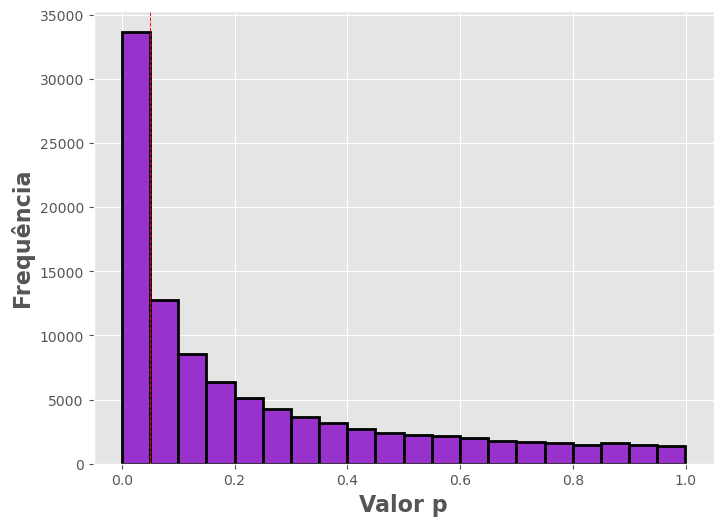

In [9]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

plt.hist(ps_student, bins = 20, color = "darkorchid", ec = "black", lw = 2)
plt.xlabel("Valor p", size = 16, fontweight = "bold")
plt.ylabel("Frequência", size = 16, fontweight = "bold")
plt.axvline(x = alpha, linewidth = 0.7, color = 'red', ls = '--')

plt.savefig('Figura 5.jpg', dpi = 600, bbox_inches = "tight")
plt.show()

# Simulação 3: Hipótese nula falsa (inteligência de mulheres é 0,5 DP [7,5 pontos] maior que a de homens). No entanto, repetiremos as simulações várias vezes, com n = 50 por grupo. Suponha que 7 diferentes pesquisadores adotem 7 critérios alfas distintos (0,0001, 0,001, 0,01, 0,05, 0,10 e 0,20) nesses estudos.

## Questão 5: Qual pesquisador afirmará ter encontrado mais estudos com diferenças significativas e qual afirmará ter encontrado mais estudos sem diferenças significativas? Por quê?

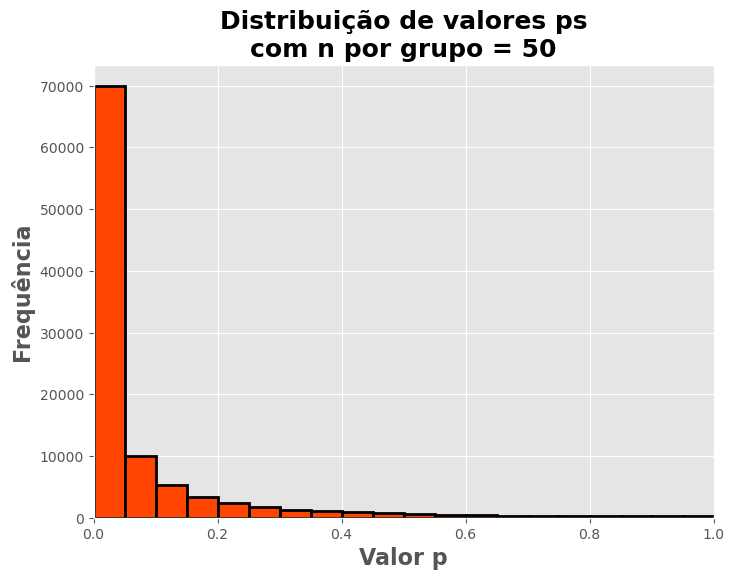

In [10]:
# Gera uma semente
np.random.seed(42)

# Parâmetros da simulação
mu_homens, mu_mulheres, sigma = 100, 107.5, 15 # mulheres têm 0,5 DP mais inteligência que homens
n = 50 # tamanhos grupais
alphas = [0.0001, 0.001, 0.01, 0.05, 0.10, 0.20]
n_simulacoes = 100_000 
significativos = [0] * len(alphas)


# Rodando as simulações
   
# Lista armazenará os valores p obtidos em cada simulação
ps_student = list()

for simulacao in range(0, n_simulacoes):
    # Gerando os dados de cada grupo
    # Note que as médias dos grupos agora são diferentes; logo, H0 é falsa
    # portanto, número de resultados significativos deveria ser próximo ao poder estatístico nominal
    masculino = np.random.normal(loc = mu_homens, scale = sigma, size = n)
    feminino = np.random.normal(loc = mu_mulheres, scale = sigma, size = n)

    # Rodando testes t de Student
    t_student, p_student, gl_student = ttest_ind(masculino, feminino, alternative = 'two-sided', usevar = 'pooled')

    # percorre os diferentes alfas para calcular se o resultado foi significativo segundo diferentes critérios de decisão
    for i, alpha in enumerate(alphas):
        if p_student < alpha:
            significativos[i] += 1 # então observamos um efeito (não necessariamente, na direção existente na população!)

    # guarda valores ps de cada simulação uma lista
    ps_student.append(p_student)

# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)    

plt.hist(ps_student, bins = 20, color = "orangered", ec = "black", lw = 2)
plt.xlim(0, 1)
plt.xlabel("Valor p", size = 16, fontweight = "bold")
plt.ylabel("Frequência", size = 16, fontweight = "bold")
plt.title(f"Distribuição de valores ps\ncom n por grupo = {n}", size = 18, fontweight = "bold")
plt.savefig(f'Figura 6.jpg', dpi = 600, bbox_inches = "tight")
plt.show()

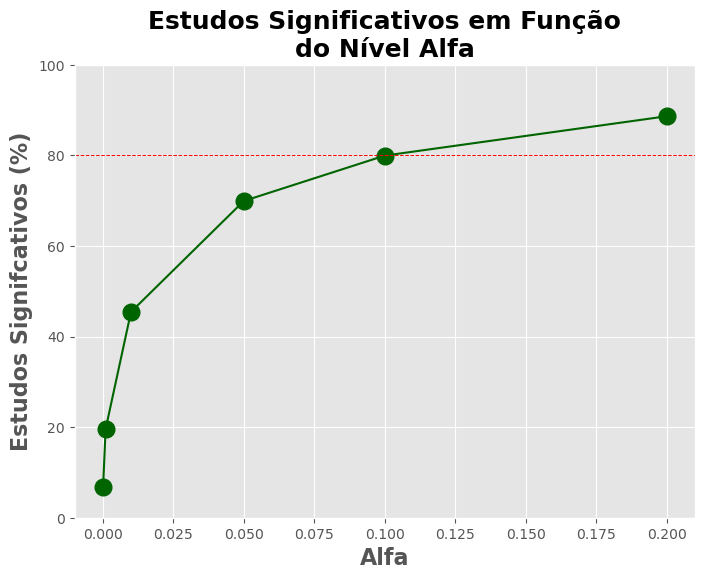

In [11]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

plt.plot(alphas, np.array(significativos) / n_simulacoes * 100, color = "darkgreen",
        marker = 'o', markersize = 12)
plt.xlabel("Alfa", size = 16, fontweight = "bold")
plt.ylabel("Estudos Signifcativos (%)", size = 16, fontweight = "bold")
plt.ylim(0, 100)
plt.axhline(y = 80, linewidth = 0.7, color = 'red', ls = '--')
plt.title(f"Estudos Significativos em Função\ndo Nível Alfa", size = 18, fontweight = "bold")
plt.savefig(f'Figura 7.jpg', dpi = 600, bbox_inches = "tight")
plt.show()

In [12]:
np.array(significativos) / n_simulacoes * 100

array([ 6.803, 19.579, 45.433, 69.919, 79.937, 88.627])

# Simulação 4: Hipótese nula falsa (inteligência de mulheres é 0,5 DP [7,5 pontos] maior que a de homens). No entanto, repetiremos as simulações várias vezes, com cenários considerando diferentes tamanhos amostrais, de 8 a 96, em incrementos de 8 participantes por grupo.

## Questão 6: O percentual de valores ps que serão menores que o alfa variará em função dos tamanhos dos grupos? Por quê?

No cenário com 8 participantes por grupo, em 100000 simulações, 15376 (15.38%) testes t de Student foram significativos.


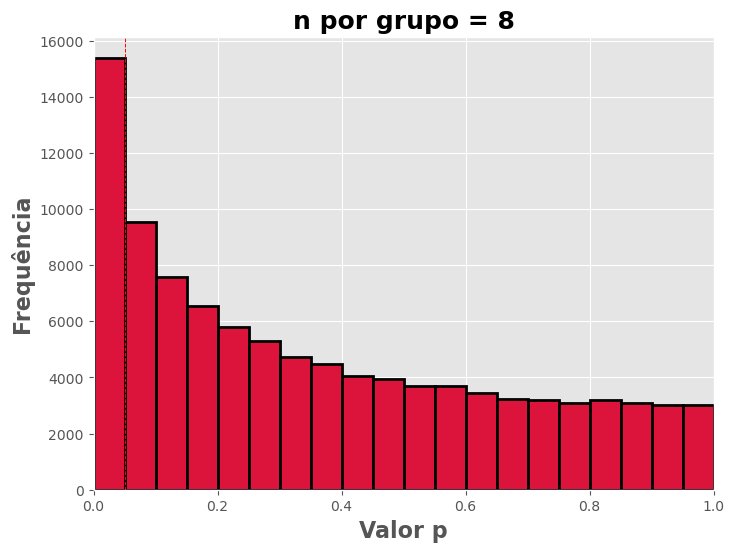

No cenário com 16 participantes por grupo, em 100000 simulações, 27738 (27.74%) testes t de Student foram significativos.


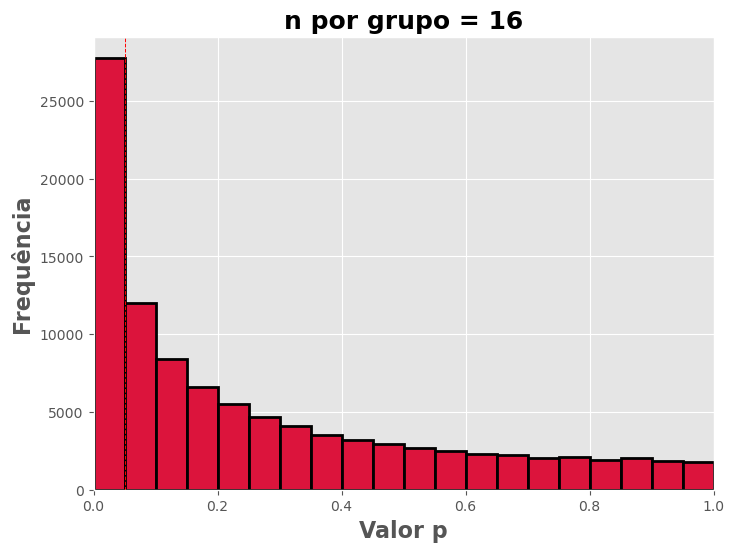

No cenário com 24 participantes por grupo, em 100000 simulações, 39530 (39.53%) testes t de Student foram significativos.


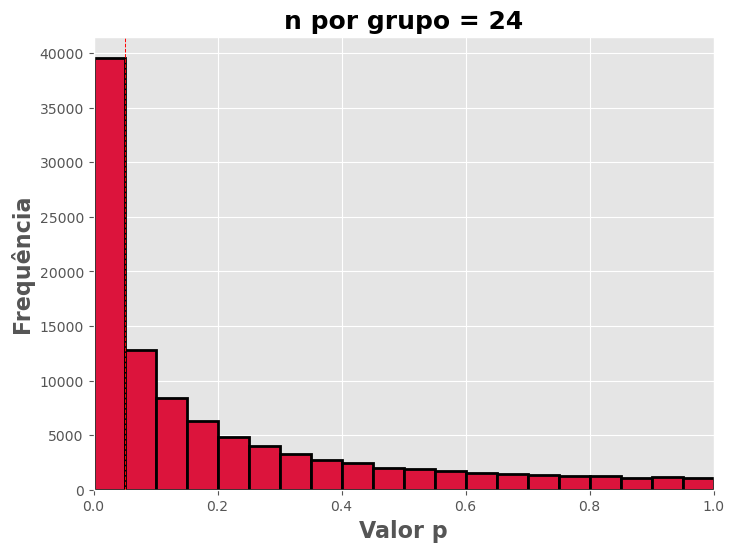

No cenário com 32 participantes por grupo, em 100000 simulações, 50297 (50.30%) testes t de Student foram significativos.


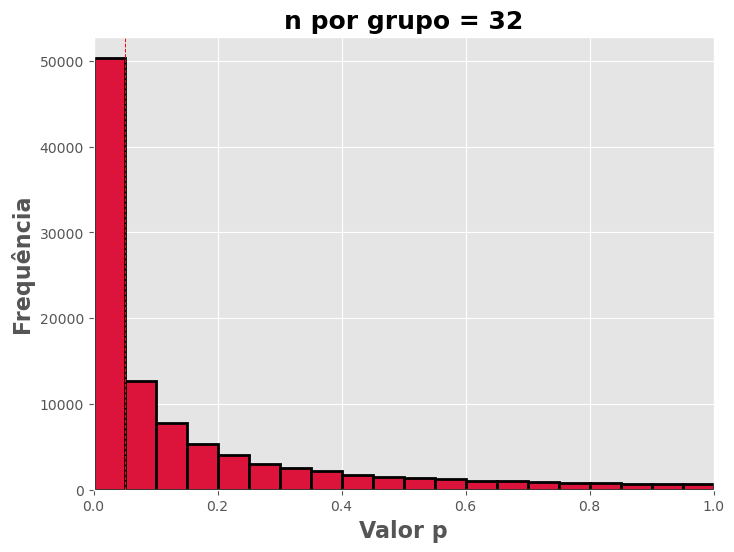

No cenário com 40 participantes por grupo, em 100000 simulações, 59779 (59.78%) testes t de Student foram significativos.


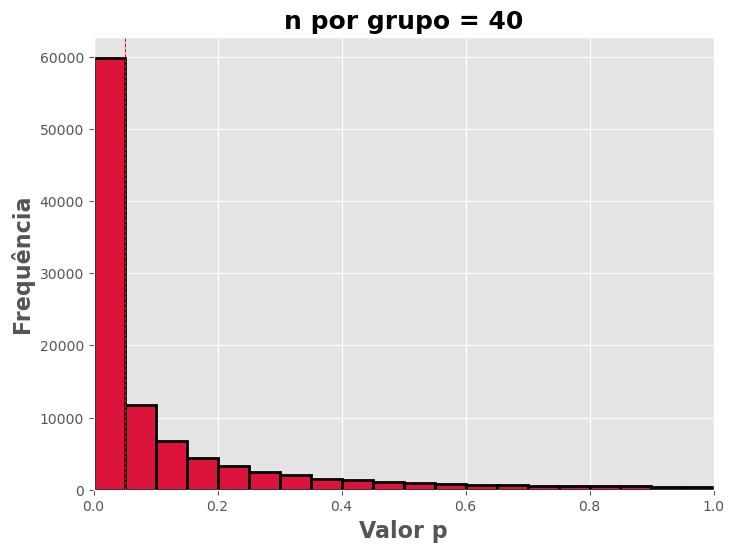

No cenário com 48 participantes por grupo, em 100000 simulações, 67803 (67.80%) testes t de Student foram significativos.


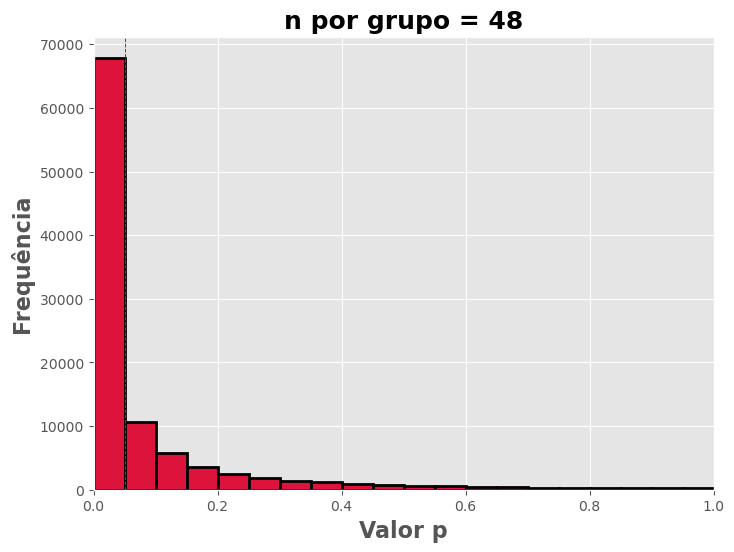

No cenário com 56 participantes por grupo, em 100000 simulações, 74680 (74.68%) testes t de Student foram significativos.


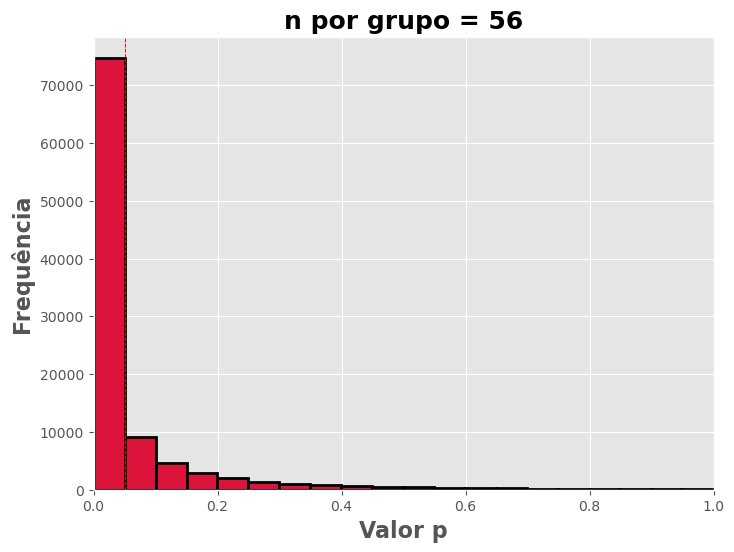

No cenário com 64 participantes por grupo, em 100000 simulações, 80159 (80.16%) testes t de Student foram significativos.


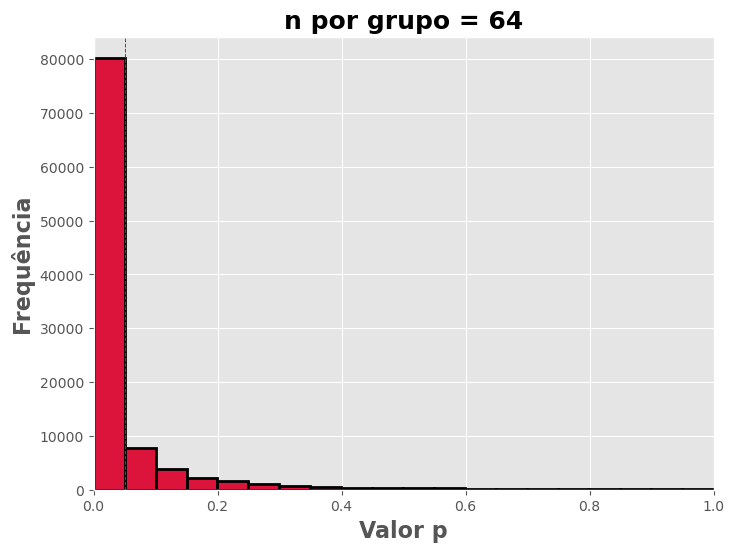

No cenário com 72 participantes por grupo, em 100000 simulações, 84790 (84.79%) testes t de Student foram significativos.


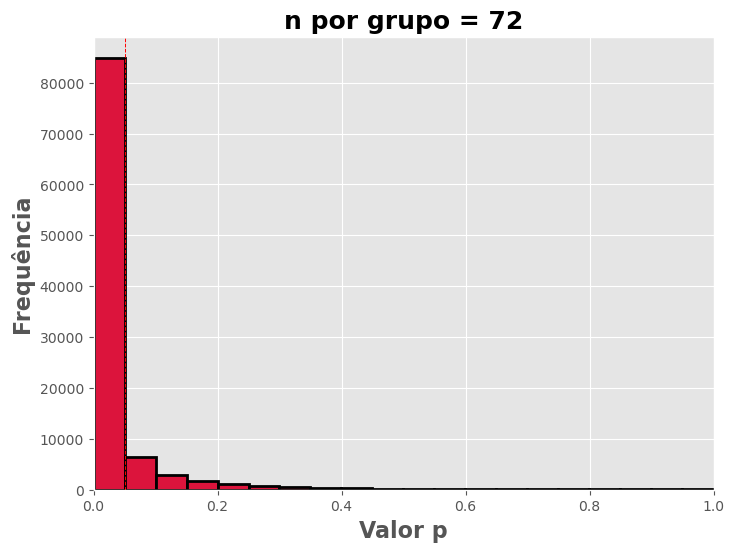

No cenário com 80 participantes por grupo, em 100000 simulações, 88230 (88.23%) testes t de Student foram significativos.


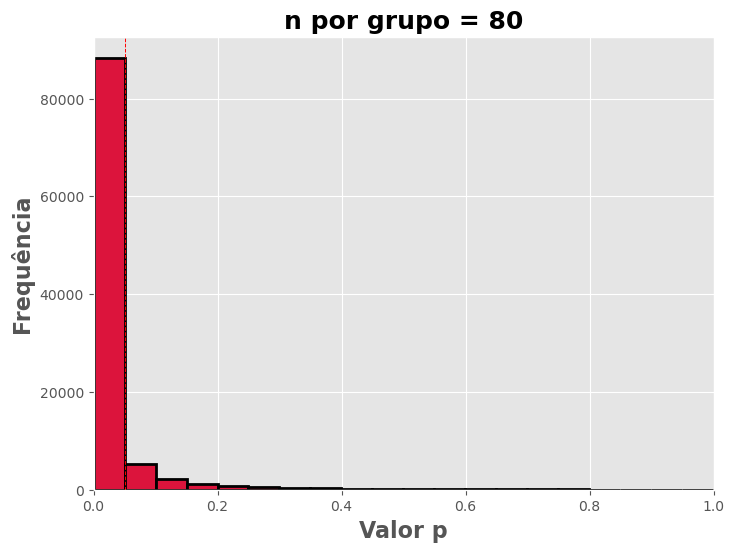

No cenário com 88 participantes por grupo, em 100000 simulações, 90878 (90.88%) testes t de Student foram significativos.


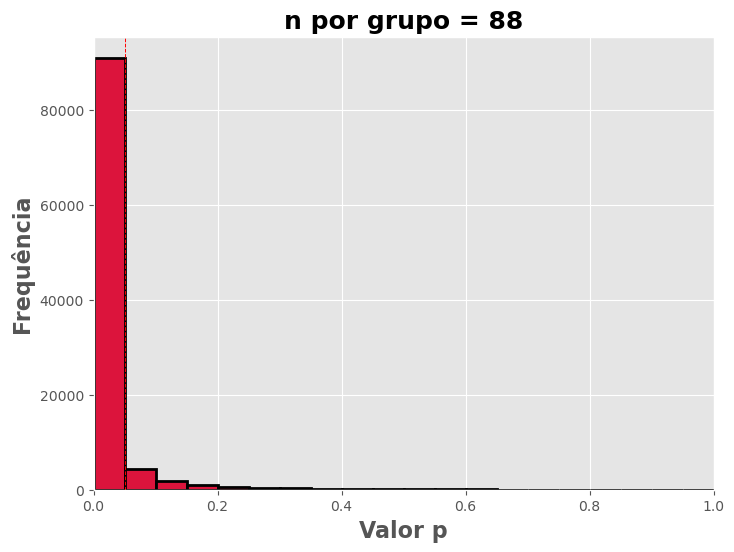

No cenário com 96 participantes por grupo, em 100000 simulações, 92999 (93.00%) testes t de Student foram significativos.


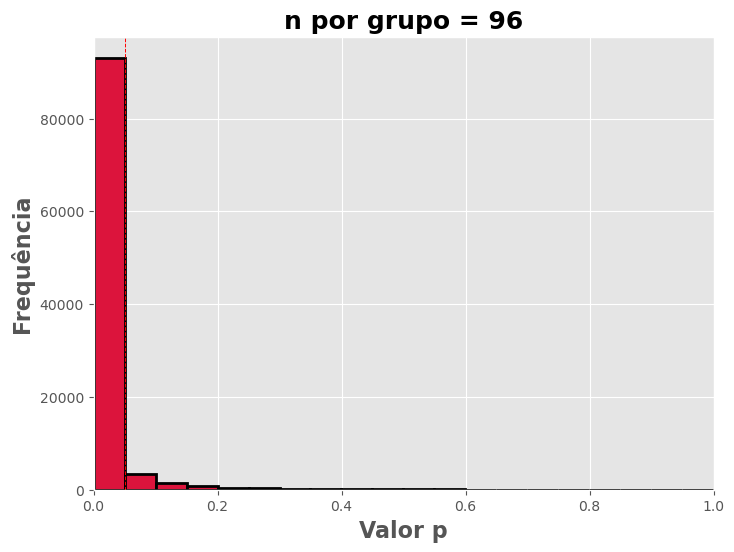

In [13]:
# Gera uma semente
np.random.seed(42)

# Parâmetros da simulação
mu_homens, mu_mulheres, sigma = 100, 107.5, 15 # mulheres têm 0,5 DP mais inteligência que homens
ns = [i for i in range(8, 97, 8)] # tamanhos grupais
alpha = 0.05
n_simulacoes = 100_000 
significativos = list()


# Rodando as simulações
for j, n in enumerate(ns):
    
    significativo = 0 # conta número de resultados resultados significativos
    
    # Lista armazenará os valores p obtidos em cada simulação
    ps_student = list()
    
    for simulacao in range(0, n_simulacoes):
        # Gerando os dados de cada grupo
        # Note que as médias dos grupos agora são diferentes; logo, H0 é falsa
        # portanto, número de resultados significativos deveria ser próximo ao poder estatístico nominal
        masculino = np.random.normal(loc = mu_homens, scale = sigma, size = n)
        feminino = np.random.normal(loc = mu_mulheres, scale = sigma, size = n)

        # Rodando testes t de Student
        t_student, p_student, gl_student = ttest_ind(masculino, feminino, alternative = 'two-sided', usevar = 'pooled')

        # se o p do Student < alfa      
        if p_student < alpha:
            significativo += 1 # então observamos um efeito (não necessariamente, na direção existente na população!)

        # guarda valores ps de cada simulação uma lista
        ps_student.append(p_student)

    
    significativos.append(significativo)
    
    # Imprime a síntese dos resultados
    print(f"No cenário com {n} participantes por grupo, em {n_simulacoes} simulações, {significativo} ({significativo / n_simulacoes * 100:.2f}%) testes t de Student foram significativos.")
    
    # Tamanho e resolução do gráfico
    plt.figure(figsize = (8, 6), dpi = 100)    
    
    plt.hist(ps_student, bins = 20, color = "crimson", ec = "black", lw = 2)
    plt.xlim(0, 1)
    plt.xlabel("Valor p", size = 16, fontweight = "bold")
    plt.ylabel("Frequência", size = 16, fontweight = "bold")
    plt.axvline(x = alpha, linewidth = 0.7, color = 'red', ls = '--')
    plt.title(f"n por grupo = {n}", size = 18, fontweight = "bold")
    plt.savefig(f'Figura 8.{j + 1}.jpg', dpi = 600, bbox_inches = "tight")
    plt.show()

## Questão 7: Mantido o tamanho de efeito constante, qual é o significado da relação entre percentual de estudos significativos e tamanho amostral?

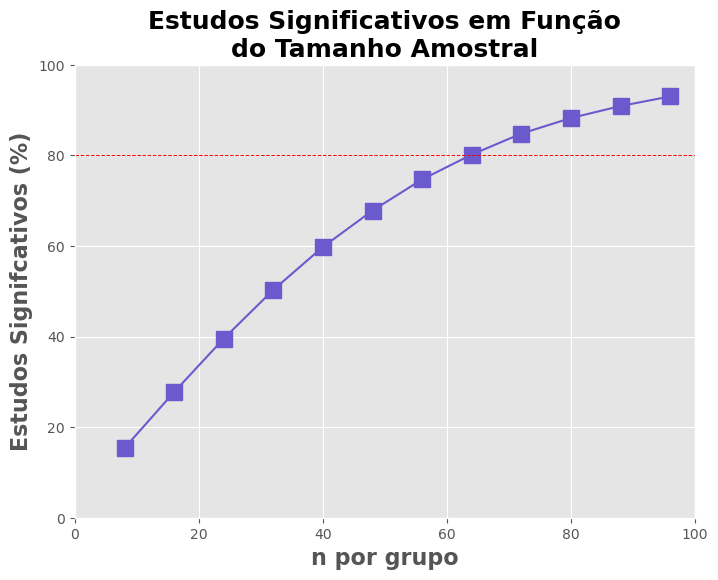

In [14]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

plt.plot(ns, np.array(significativos) / n_simulacoes * 100,
         color = "slateblue", marker = 's', markersize = 12)
plt.xlabel("n por grupo", size = 16, fontweight = "bold")
plt.ylabel("Estudos Signifcativos (%)", size = 16, fontweight = "bold")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axhline(y = 80, linewidth = 0.7, color = 'red', ls = '--')
plt.title(f"Estudos Significativos em Função\ndo Tamanho Amostral", size = 18, fontweight = "bold")
plt.savefig('Figura 9.jpg', dpi = 600, bbox_inches = "tight")
plt.show()

# Simulação 5: Mulheres Terão Diferentes Graus de Vantagem em Escores de Inteligência em Relação a Homens, Mas Tamanho Amostral (20 por Grupo) e Alfa Serão Fixos (0,05).

## Esses cenários incluem homens sempre com inteligência média igual a 100. Mulheres terão inteligências médias variando em 100 e 115, com incrementos de 1,5, correspondendo, respectivamente, a ds de Cohen de 0 a 1, em incrementos de 0,1.  

### Questão 8: O percentual de valores ps que serão menores que o alfa variará em função dos escores médio de inteligência das mulheres? Por quê?

No cenário em que mulheres têm escores de inteligência, em média,
    0 ponto(s) maior(es) que homens, em 100000 simulações,
    4954 (4.95%) testes t de Student
    foram significativos.


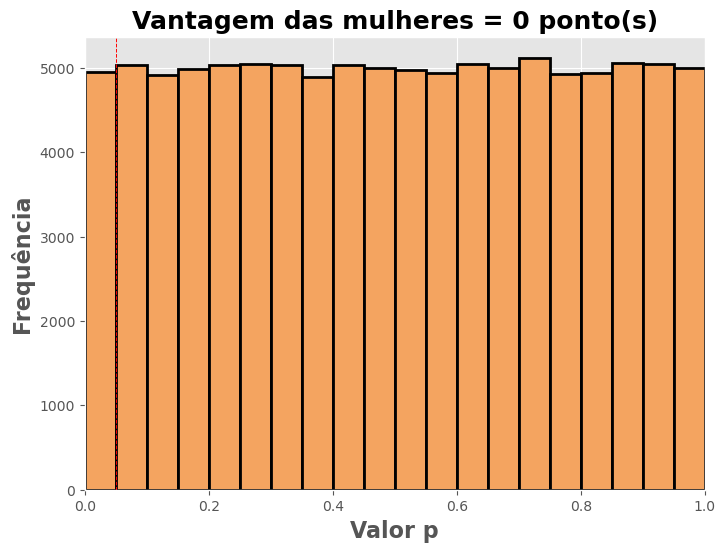

No cenário em que mulheres têm escores de inteligência, em média,
    1.5 ponto(s) maior(es) que homens, em 100000 simulações,
    5993 (5.99%) testes t de Student
    foram significativos.


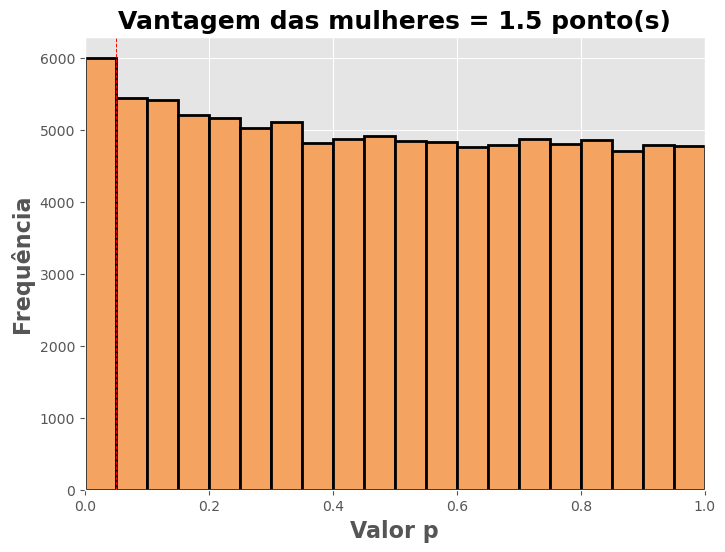

No cenário em que mulheres têm escores de inteligência, em média,
    3 ponto(s) maior(es) que homens, em 100000 simulações,
    9385 (9.38%) testes t de Student
    foram significativos.


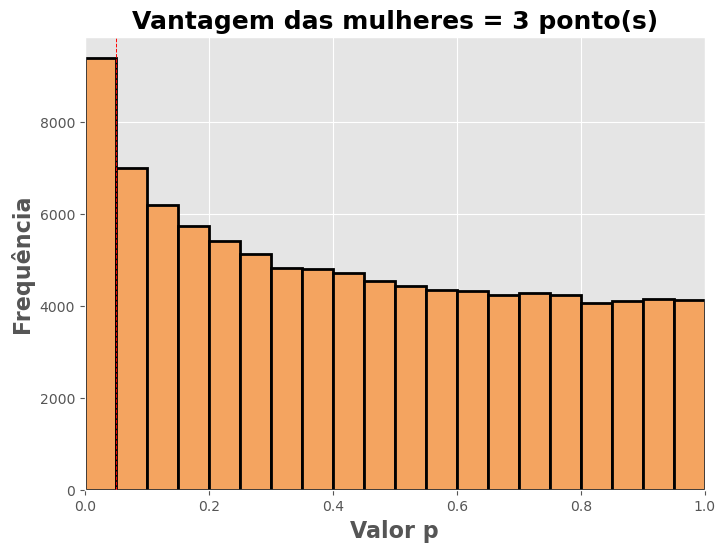

No cenário em que mulheres têm escores de inteligência, em média,
    4.5 ponto(s) maior(es) que homens, em 100000 simulações,
    15129 (15.13%) testes t de Student
    foram significativos.


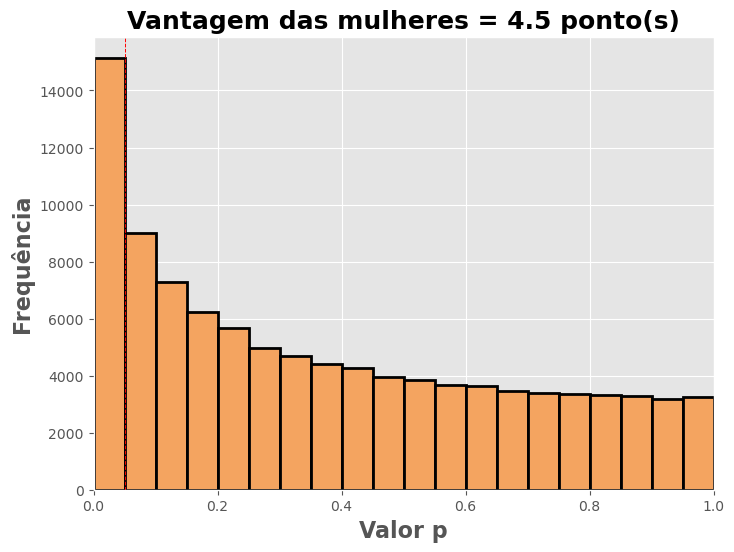

No cenário em que mulheres têm escores de inteligência, em média,
    6 ponto(s) maior(es) que homens, em 100000 simulações,
    23277 (23.28%) testes t de Student
    foram significativos.


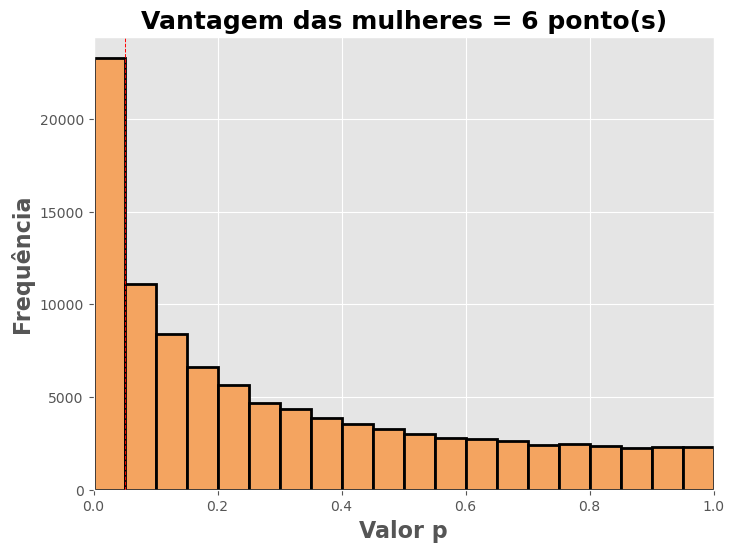

No cenário em que mulheres têm escores de inteligência, em média,
    7.5 ponto(s) maior(es) que homens, em 100000 simulações,
    33796 (33.80%) testes t de Student
    foram significativos.


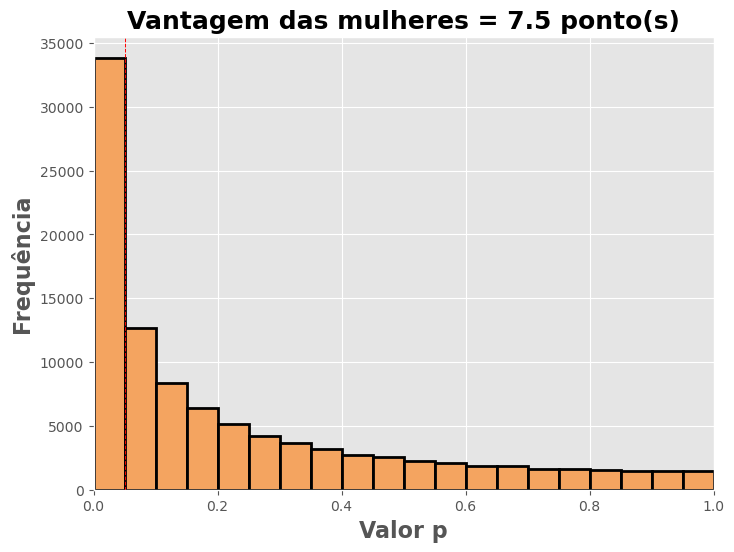

No cenário em que mulheres têm escores de inteligência, em média,
    9 ponto(s) maior(es) que homens, em 100000 simulações,
    45446 (45.45%) testes t de Student
    foram significativos.


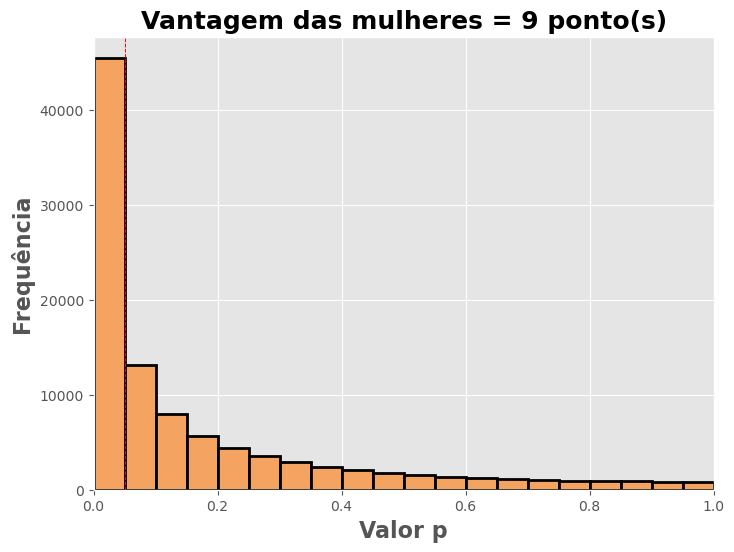

No cenário em que mulheres têm escores de inteligência, em média,
    10.5 ponto(s) maior(es) que homens, em 100000 simulações,
    57571 (57.57%) testes t de Student
    foram significativos.


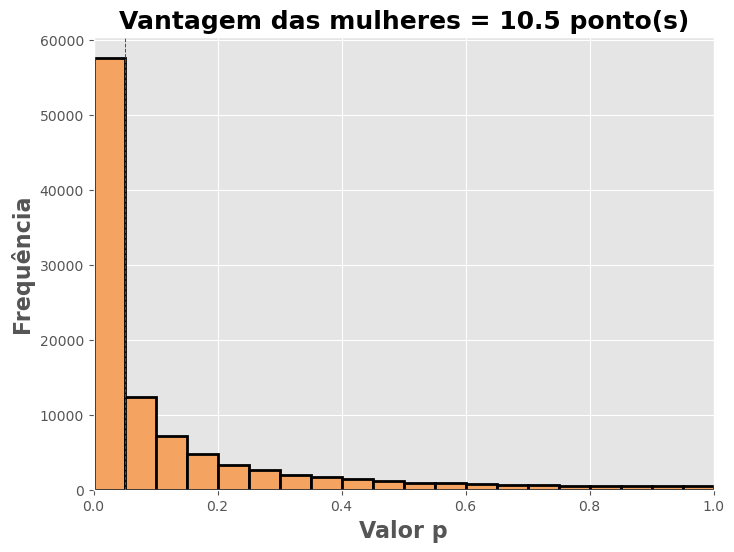

No cenário em que mulheres têm escores de inteligência, em média,
    12 ponto(s) maior(es) que homens, em 100000 simulações,
    69423 (69.42%) testes t de Student
    foram significativos.


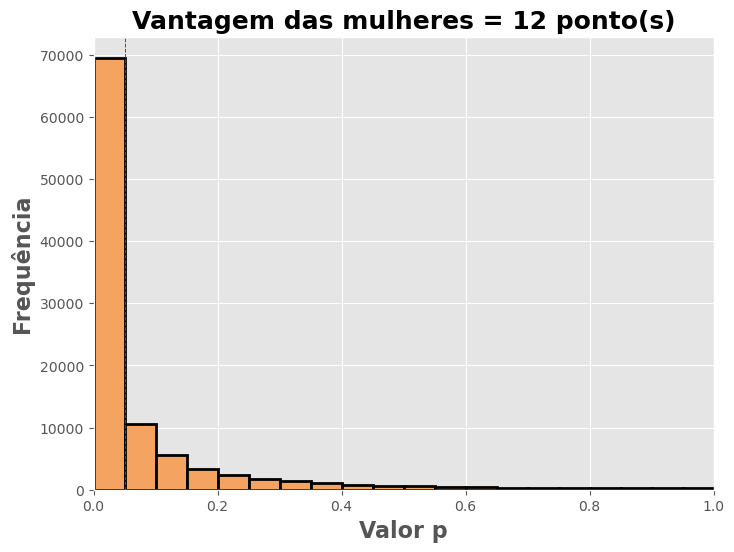

No cenário em que mulheres têm escores de inteligência, em média,
    13.5 ponto(s) maior(es) que homens, em 100000 simulações,
    79172 (79.17%) testes t de Student
    foram significativos.


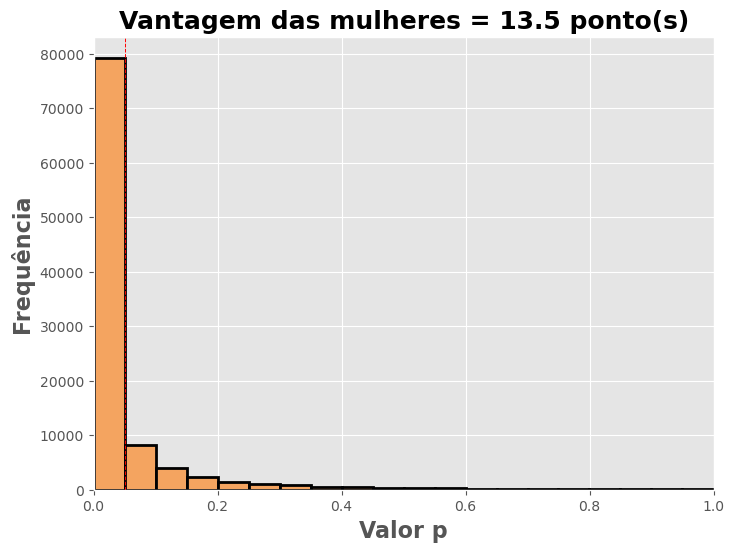

No cenário em que mulheres têm escores de inteligência, em média,
    15 ponto(s) maior(es) que homens, em 100000 simulações,
    87039 (87.04%) testes t de Student
    foram significativos.


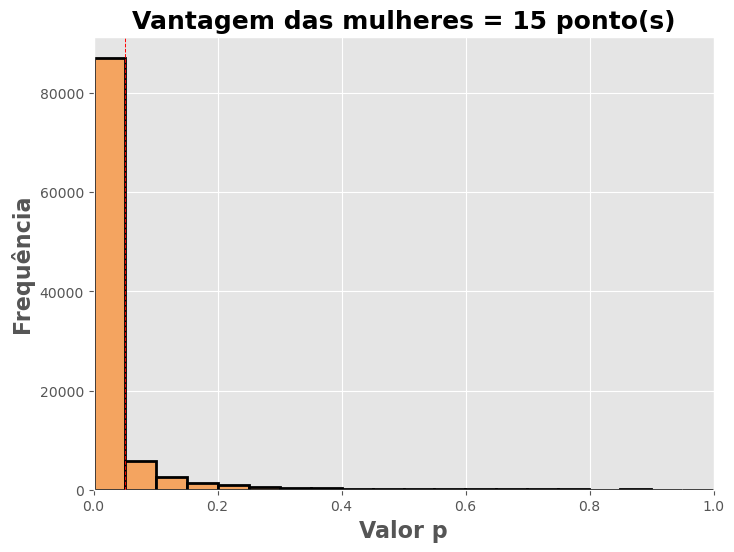

In [15]:
# Gera uma semente
np.random.seed(42)

# Parâmetros da simulação
mu_homens, sigma, n = 100, 15, 20

# agora mulheres superam homens em inteligência em diferentes níveis (diferentes cenários)
mus_mulheres = [100, 101.5, 103, 104.5, 106, 107.5, 109, 110.5, 112, 113.5, 115]
alpha = 0.05
n_simulacoes = 100_000 
significativos = list()


# Rodando as simulações
for j, efeito in enumerate(mus_mulheres):
    
    significativo = 0 # conta número de resultados resultados significativos
    
    # Lista armazenará os valores p obtidos em cada simulação
    ps_student = list()
    
    for simulacao in range(0, n_simulacoes):
        # Gerando os dados de cada grupo
        # Note que as médias dos grupos agora são diferentes; logo, H0 é falsa
        # portanto, número de resultados significativos deveria ser próximo ao poder estatístico nominal
        masculino = np.random.normal(loc = mu_homens, scale = sigma, size = n)
        feminino = np.random.normal(loc = efeito, scale = sigma, size = n)

        # Rodando testes t de Student
        t_student, p_student, gl_student = ttest_ind(masculino, feminino, alternative = 'two-sided', usevar = 'pooled')

        # se o p do Student < alfa      
        if p_student < alpha:
            significativo += 1 # então observamos um efeito (não necessariamente, na direção existente na população!)

        # guarda valores ps de cada simulação uma lista
        ps_student.append(p_student)

    
    significativos.append(significativo)
    
    # Imprime a síntese dos resultados
    print(f"""No cenário em que mulheres têm escores de inteligência, em média,
    {efeito - mu_homens} ponto(s) maior(es) que homens, em {n_simulacoes} simulações,
    {significativo} ({significativo / n_simulacoes * 100:.2f}%) testes t de Student
    foram significativos.""")
    
    # Tamanho e resolução do gráfico
    plt.figure(figsize = (8, 6), dpi = 100)    
    
    plt.hist(ps_student, bins = 20, color = "sandybrown", ec = "black", lw = 2)
    plt.xlim(0, 1)
    plt.xlabel("Valor p", size = 16, fontweight = "bold")
    plt.ylabel("Frequência", size = 16, fontweight = "bold")
    plt.axvline(x = alpha, linewidth = 0.7, color = 'red', ls = '--')
    plt.title(f"Vantagem das mulheres = {efeito - mu_homens} ponto(s)", size = 18, fontweight = "bold")
    plt.savefig(f'Figura 10.{j + 1}.jpg', dpi = 600, bbox_inches = "tight")
    plt.show()

### Questão 9: Mantido o tamanho amostral e o nível de significância constante, qual é o significado da relação entre percentual de estudos significativos e tamanho de efeito?

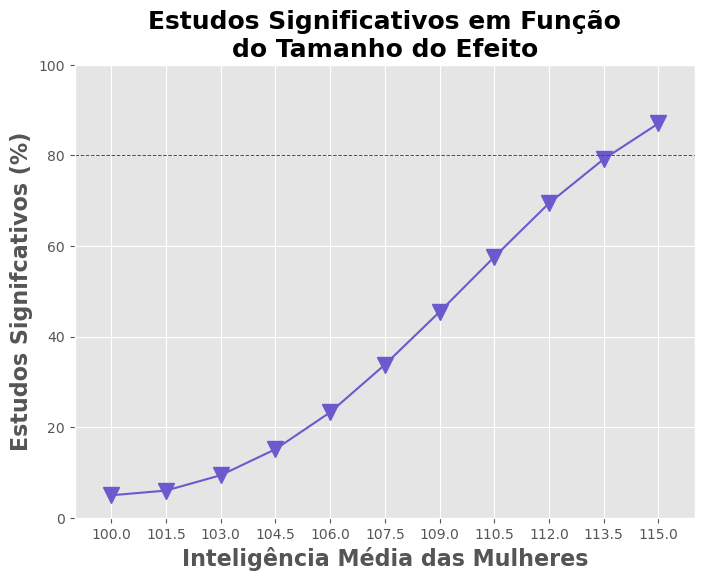

In [25]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

plt.plot(mus_mulheres, np.array(significativos) / n_simulacoes * 100,
         color = "slateblue", marker = 'v', markersize = 12)
plt.xlabel("Inteligência Média das Mulheres", size = 16, fontweight = "bold")
plt.ylabel("Estudos Signifcativos (%)", size = 16, fontweight = "bold")
plt.xlim(99, 116)
plt.xticks(mus_mulheres)
plt.ylim(0, 100)
plt.axhline(y = 80, linewidth = 0.7, color = 'red', ls = '--')
plt.title(f"Estudos Significativos em Função\ndo Tamanho do Efeito", size = 18, fontweight = "bold")
plt.savefig('Figura 11.1.jpg', dpi = 600, bbox_inches = "tight")
plt.show()

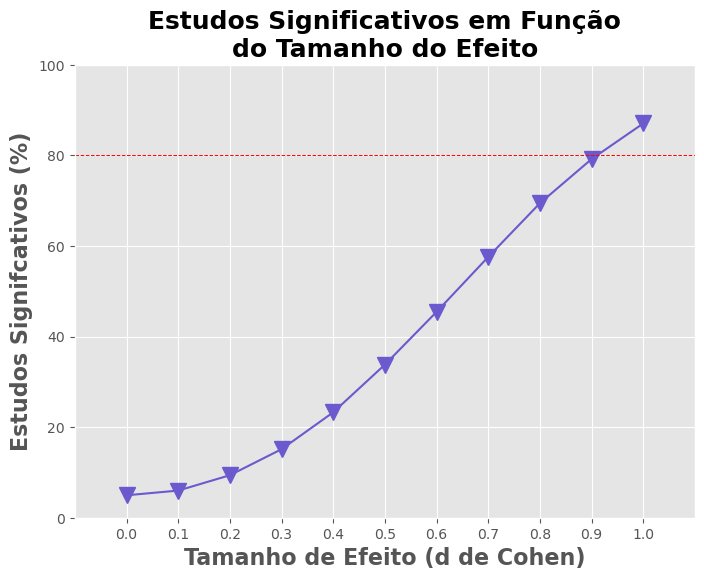

In [26]:
ds = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]

# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 100)

plt.plot(ds, np.array(significativos) / n_simulacoes * 100,
         color = "slateblue", marker = 'v', markersize = 12)
plt.xlabel("Tamanho de Efeito (d de Cohen)", size = 16, fontweight = "bold")
plt.ylabel("Estudos Signifcativos (%)", size = 16, fontweight = "bold")
plt.xlim(-.1, 1.1)
plt.xticks(ds)
plt.ylim(0, 100)
plt.axhline(y = 80, linewidth = 0.7, color = 'red', ls = '--')
plt.title(f"Estudos Significativos em Função\ndo Tamanho do Efeito", size = 18, fontweight = "bold")
plt.savefig('Figura 11.2.jpg', dpi = 600, bbox_inches = "tight")
plt.show()